# JSONパラメータを使ったミラー作成
変えたところにメモを残しております

### 1. ライブラリをいくつか追加
1. json
2. pickle

In [24]:
import numpy as np
import pandas as pd
import json
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### 2. load_json_paramsの作成
pathを引数としてjsonを読み取りdictを返す関数

In [25]:
def load_json_params(json_path):
    
    with open(json_path, "r") as f:
        input_json = json.load(f)
    
    return input_json

### 3. make_param_listを改修
1. パラメータ全てについてマジックナンバーではなくdict(json)による定数に変更
2. init_theta_listに新たなパラメータ(theta_rate)の追加
3. 返り値に`axis_x`と`axis_y`と`dat_num`を追加
4. coorをcoordに変更

In [26]:
def make_param_list(mirror_params):

    ellipse_nums = []
    param_list = []

    for dat_i in range(mirror_params['dat_num']):

        ellipse_nums.append(np.random.randint(mirror_params['elip_num_min'], mirror_params['elip_num_max']))

        init_elip_len_x_list = np.random.randint(mirror_params['elip_len_x_min'], mirror_params['elip_len_x_max'], size=ellipse_nums[dat_i])
        init_elip_len_y_list = np.random.randint(mirror_params['elip_len_y_min'], mirror_params['elip_len_y_max'], size=ellipse_nums[dat_i])
        init_coord_x_list = np.random.randint(mirror_params['coord_x_min'], mirror_params['coord_x_max'], size=ellipse_nums[dat_i])
        init_coord_y_list = np.random.randint(mirror_params['coord_y_min'], mirror_params['coord_y_max'], size=ellipse_nums[dat_i])
        init_theta_list = np.pi*np.random.rand(ellipse_nums[dat_i])*2 / mirror_params['theta_rate']

        param_list.append(np.array([init_elip_len_x_list, init_elip_len_y_list, init_coord_x_list, init_coord_y_list, init_theta_list]))
        
    return param_list, ellipse_nums, mirror_params['axis_x'], mirror_params['axis_y'], mirror_params['dat_num']

### 4. lambda式のellipse_formulaの消去
- 処理が冗長と感じたので除去
- `make_elip_spot_mirror`関数内ではシンプルに計算

In [28]:
def make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coord_x_list, coord_y_list, theta_list, axis_x, axis_y, ellipse_num):
    
    elip_spot_mirror = np.zeros([axis_x, axis_y])
    
    for k in range(ellipse_num):
        rotate = np.array([[np.cos(theta_list[k]),np.sin(theta_list[k])],[-np.sin(theta_list[k]), np.cos(theta_list[k])]])
        
        for j in range(axis_y):
            for i in range(axis_x):
                y = j + 1
                x = i + 1
                
                [X, Y] = np.dot([x - coord_x_list[k], y - coord_y_list[k]], rotate)

                x_formula = X**2 / elip_len_x_list[k]**2
                y_formula = Y**2 / elip_len_y_list[k]**2

                if x_formula + y_formula <= 1:
                    elip_spot_mirror[j,i] += 1
    
    return elip_spot_mirror

### 5. 色々変更
1. 初期化は`dat`と`json_path`だけ
2. `load_json_params関数`をつかってjsonファイルを読み込み、`target`keyを指定する
3. make_param_listの引数にjsonで受け取ったパラメータ(dict型)を渡す
4. coorをcoordに変更

In [14]:
dat = []
json_path = "./input_noda.json"

mirror_params = load_json_params(json_path)['target']
param_list, ellipse_nums, axis_x, axis_y, dat_num = make_param_list(mirror_params)

for [elip_len_x_list, elip_len_y_list, coord_x_list, coord_y_list, theta_list], ellipse_num in tqdm(zip(param_list, ellipse_nums), total=dat_num):
    dat.append(make_elip_spot_mirror(elip_len_x_list, elip_len_y_list, coord_x_list, coord_y_list, theta_list, axis_x, axis_y, ellipse_num))

100%|██████████| 16/16 [00:11<00:00,  1.41it/s]


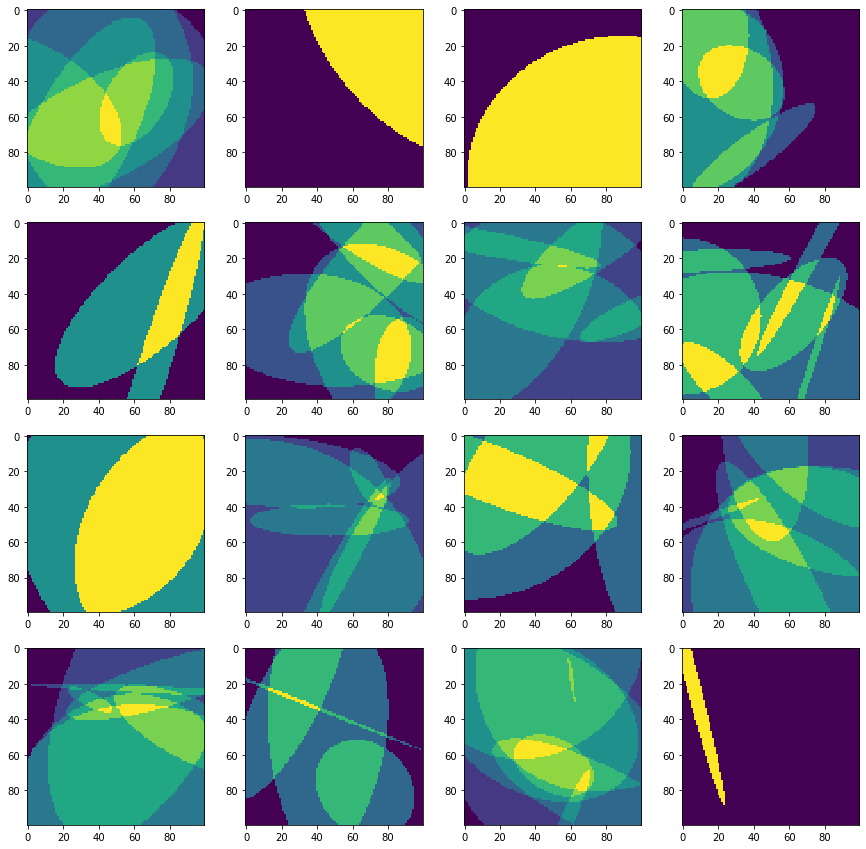

In [15]:
fig = plt.figure(figsize=(15,15))

for i in range(len(dat)):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(dat[i])

In [18]:
with open('./zikken.pkl', 'wb') as f:
    pickle.dump(dat, f)

In [29]:
ls

hazimeteno_load_json.ipynb  jsonファイルのパラメータ解説.md  zikken.pkl
input_first.json            make_ellipse_v4.ipynb
input_noda.json             pkl_surf_teacher_1000.pkl*


In [30]:
with open('./pkl_surf_teacher_1000.pkl', 'rb') as f:
    zikken = pickle.load(f)

In [49]:
zikken[0]

{'m': 4,
 'n': 3,
 'z': array([[-0.03669262, -0.14385044, -0.23346216, ...,  0.24233293,
          0.15690099,  0.0543464 ],
        [-0.09368773, -0.19972127, -0.2922966 , ...,  0.21056396,
          0.08899807, -0.01854786],
        [-0.17999296, -0.27452088, -0.3551708 , ...,  0.10591499,
         -0.01237661, -0.08658618],
        ...,
        [ 0.17755479,  0.0801393 , -0.01210858, ...,  0.4079795 ,
          0.34774048,  0.27181763],
        [ 0.11029223,  0.00472144, -0.08257265, ...,  0.36326805,
          0.28938327,  0.2065974 ],
        [ 0.02953939, -0.04736597, -0.16454763, ...,  0.30526334,
          0.20896758,  0.12695882]]),
 'x': array([[-50.        , -50.        , -50.        , ..., -50.        ,
         -50.        , -50.        ],
        [-49.21259843, -49.21259843, -49.21259843, ..., -49.21259843,
         -49.21259843, -49.21259843],
        [-48.42519685, -48.42519685, -48.42519685, ..., -48.42519685,
         -48.42519685, -48.42519685],
        ...,
        

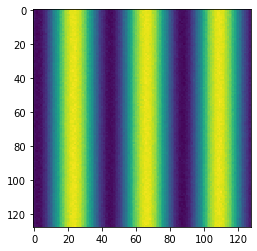

In [52]:
plt.figure()
plt.imshow(zikken[7]['z'])
plt.show()